In [6]:
# importing some necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns  

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from nltk.tokenize import RegexpTokenizer  
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer  
from sklearn.pipeline import make_pipeline

import pickle 

In [7]:
# Loading the dataset
df= pd.read_csv("urldata.csv")

In [8]:
df.head() # Displaying the first few rows of the dataset

,url,label
0,https://www.google.com,benign
1,https://www.youtube.com,benign
2,https://www.facebook.com,benign
3,https://www.baidu.com,benign
4,https://www.wikipedia.org,benign


In [9]:
# Displaying information about the dataset, including data types and missing values
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450679 entries, 0 to 450678
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   url     450679 non-null  object
 1   label   450679 non-null  object
dtypes: object(2)
memory usage: 6.9+ MB


In [10]:
df.shape # Getting the shape (number of rows and columns) of the dataset

(450679, 2)

In [11]:
# Checking for missing values in the dataset
df.isnull().sum()

url      0
label    0
dtype: int64

<Axes: xlabel='label', ylabel='count'>

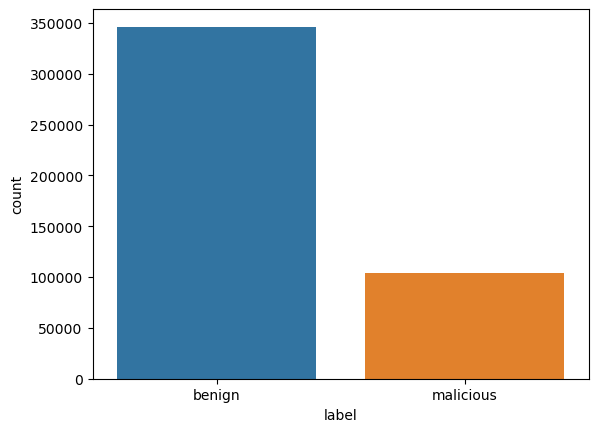

In [12]:
sns.countplot(x="label",data=df) # Creating a countplot to visualize the distribution of 'Label' in the dataset

# Tokenizing the URL strings using a regular expression tokenizer

In [13]:
tokenizer = RegexpTokenizer(r'[A-Za-z]+')

In [14]:
tokenizer.tokenize(df.url[0])

['https', 'www', 'google', 'com']

In [15]:
# Tokenizing all the URL strings in the dataset
print('Getting words tokenized ...')
df['text_tokenized'] = df.url.map(lambda t: tokenizer.tokenize(t))

Getting words tokenized ...


In [16]:
df.sample(5)

,url,label,text_tokenized
223406,https://www.java2s.com/Code/Java/Chart/Pie-Cha...,benign,"[https, www, java, s, com, Code, Java, Chart, ..."
365841,http://s-teamworld.com/files/resume/mails1/ii....,malicious,"[http, s, teamworld, com, files, resume, mails..."
353868,http://wopper.bioblitzgaming.ca/pwigd3.html,malicious,"[http, wopper, bioblitzgaming, ca, pwigd, html]"
36122,https://www.en.wikipedia.org/wiki/List_of_Nipp...,benign,"[https, www, en, wikipedia, org, wiki, List, o..."
112542,https://www.us.keegy.com/post/interstate-880-o...,benign,"[https, www, us, keegy, com, post, interstate,..."


In [17]:
# Applying Snowball stemming to the tokenized words
stemmer = SnowballStemmer("english") # choose a language

In [18]:
# Getting all the stemmed words
print('Getting words stemmed ...')
df['text_stemmed'] = df['text_tokenized'].map(lambda l: [stemmer.stem(word) for word in l])

Getting words stemmed ...


In [19]:
df.sample(5)

,url,label,text_tokenized,text_stemmed
395039,http://192.99.224.252,malicious,[http],[http]
237544,https://www.localautoguide.net/virginia/,benign,"[https, www, localautoguide, net, virginia]","[https, www, localautoguid, net, virginia]"
13612,https://www.ca.linkedin.com/pub/jean-pierre-ro...,benign,"[https, www, ca, linkedin, com, pub, jean, pie...","[https, www, ca, linkedin, com, pub, jean, pie..."
245149,https://www.mcomet.com/celebrity/Winston_Hible...,benign,"[https, www, mcomet, com, celebrity, Winston, ...","[https, www, mcomet, com, celebr, winston, hib..."
316083,https://www.usshipstore.com/ZAZZLE/AKA/AKA93/,benign,"[https, www, usshipstore, com, ZAZZLE, AKA, AKA]","[https, www, usshipstor, com, zazzl, aka, aka]"


In [20]:
# Stemming all the tokenized words in the dataset
print('Get joiningwords ...')
df['text_sent'] = df['text_stemmed'].map(lambda l: ' '.join(l))

Get joiningwords ...


In [21]:
df.sample(5)

,url,label,text_tokenized,text_stemmed,text_sent
209556,https://www.helloburbank.com/landmarks/cemeter...,benign,"[https, www, helloburbank, com, landmarks, cem...","[https, www, helloburbank, com, landmark, ceme...",https www helloburbank com landmark cemeteri f...
404771,http://lookvmsoe2.top/index.php?xHiMdbKdLBnLDY...,malicious,"[http, lookvmsoe, top, index, php, xHiMdbKdLBn...","[http, lookvmso, top, index, php, xhimdbkdlbnl...",http lookvmso top index php xhimdbkdlbnldy l s...
325696,https://www.wrestlerbiographies.com/,benign,"[https, www, wrestlerbiographies, com]","[https, www, wrestlerbiographi, com]",https www wrestlerbiographi com
283210,https://www.rootsweb.ancestry.com/~ausvsac/Fos...,benign,"[https, www, rootsweb, ancestry, com, ausvsac,...","[https, www, rootsweb, ancestri, com, ausvsac,...",https www rootsweb ancestri com ausvsac foster...
142180,https://www.arrowheadpride.com/2011/8/10/23553...,benign,"[https, www, arrowheadpride, com, kansas, city...","[https, www, arrowheadprid, com, kansa, citi, ...",https www arrowheadprid com kansa citi chief t...


In [22]:
# Creating separate DataFrames for 'bad' and 'good' sites
bad_sites = df[df.label == 'malicious']
good_sites = df[df.label == 'benign']

In [23]:
bad_sites.head()

,url,label,text_tokenized,text_stemmed,text_sent
345738,http://atualizacaodedados.online,malicious,"[http, atualizacaodedados, online]","[http, atualizacaodedado, onlin]",http atualizacaodedado onlin
345739,http://webmasteradmin.ukit.me/,malicious,"[http, webmasteradmin, ukit, me]","[http, webmasteradmin, ukit, me]",http webmasteradmin ukit me
345740,http://stcdxmt.bigperl.in/klxtv/apps/uk/,malicious,"[http, stcdxmt, bigperl, in, klxtv, apps, uk]","[http, stcdxmt, bigperl, in, klxtv, app, uk]",http stcdxmt bigperl in klxtv app uk
345741,https://tubuh-syarikat.com/plugins/fields/files/,malicious,"[https, tubuh, syarikat, com, plugins, fields,...","[https, tubuh, syarikat, com, plugin, field, f...",https tubuh syarikat com plugin field file
345742,http://rolyborgesmd.com/exceword/excel.php?.ra...,malicious,"[http, rolyborgesmd, com, exceword, excel, php...","[http, rolyborgesmd, com, exceword, excel, php...",http rolyborgesmd com exceword excel php rand ...


In [24]:
good_sites.head()

,url,label,text_tokenized,text_stemmed,text_sent
0,https://www.google.com,benign,"[https, www, google, com]","[https, www, googl, com]",https www googl com
1,https://www.youtube.com,benign,"[https, www, youtube, com]","[https, www, youtub, com]",https www youtub com
2,https://www.facebook.com,benign,"[https, www, facebook, com]","[https, www, facebook, com]",https www facebook com
3,https://www.baidu.com,benign,"[https, www, baidu, com]","[https, www, baidu, com]",https www baidu com
4,https://www.wikipedia.org,benign,"[https, www, wikipedia, org]","[https, www, wikipedia, org]",https www wikipedia org


In [25]:
df.head()

,url,label,text_tokenized,text_stemmed,text_sent
0,https://www.google.com,benign,"[https, www, google, com]","[https, www, googl, com]",https www googl com
1,https://www.youtube.com,benign,"[https, www, youtube, com]","[https, www, youtub, com]",https www youtub com
2,https://www.facebook.com,benign,"[https, www, facebook, com]","[https, www, facebook, com]",https www facebook com
3,https://www.baidu.com,benign,"[https, www, baidu, com]","[https, www, baidu, com]",https www baidu com
4,https://www.wikipedia.org,benign,"[https, www, wikipedia, org]","[https, www, wikipedia, org]",https www wikipedia org


# Creating a machine learning model
# Using CountVectorizer to convert text data into a matrix of token counts

In [26]:
cv = CountVectorizer()

In [27]:
feature = cv.fit_transform(df.text_sent) #transform all text which we tokenize and stemed

In [28]:
feature[:5].toarray() # convert sparse matrix into array to print transformed features

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [29]:
# Splitting the dataset into training and testing sets
from sklearn.model_selection import train_test_split

In [30]:
trainX, testX, trainY, testY = train_test_split(feature, df.label, test_size = 0.3)

In [31]:
# Training a Logistic Regression model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [32]:
lr = LogisticRegression()
lr.fit(trainX,trainY)

C:\Users\Darji\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [33]:
# Calculating and displaying the accuracy of the Logistic Regression model on the test data
lr.score(testX,testY)

0.9978033194284193

Training Accuracy : 0.9983548617164593
Testing Accuracy : 0.9978033194284193

CLASSIFICATION REPORT

              precision    recall  f1-score   support

      benign       1.00      1.00      1.00    104133
   malicious       0.99      1.00      1.00     31071

    accuracy                           1.00    135204
   macro avg       1.00      1.00      1.00    135204
weighted avg       1.00      1.00      1.00    135204


CONFUSION MATRIX


<Axes: >

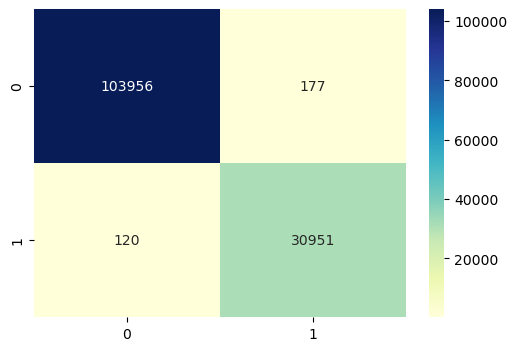

In [34]:
# creating confusing matrix
print('Training Accuracy :',lr.score(trainX,trainY))
print('Testing Accuracy :',lr.score(testX,testY))

con_mat = confusion_matrix(lr.predict(testX), testY)

print('\nCLASSIFICATION REPORT\n')
print(classification_report(lr.predict(testX), testY))

print('\nCONFUSION MATRIX')
plt.figure(figsize= (6,4))
sns.heatmap(con_mat, annot = True,fmt='d',cmap="YlGnBu")

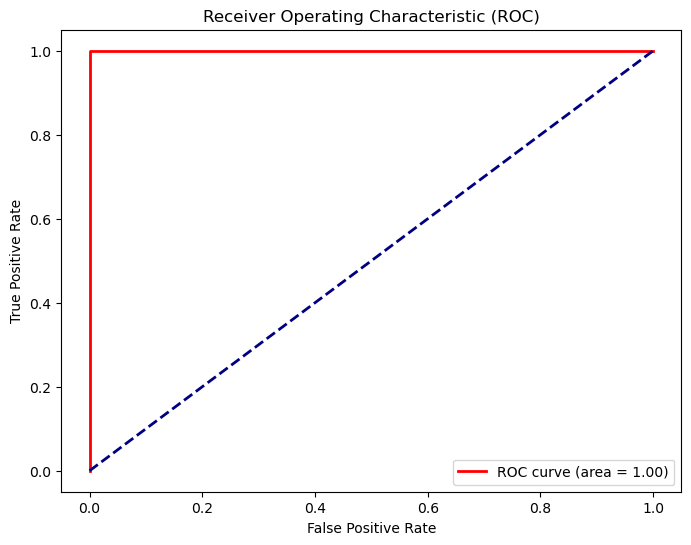

In [51]:
from sklearn.metrics import roc_curve, auc

# Map labels to binary values
testY_binary = testY.map({'benign': 0, 'malicious': 1})

# Get predicted probabilities for the positive class
probs = loaded_model.predict_proba(testX)[:, 1]

# Calculate the false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(testY_binary, probs)

# Calculate the area under the ROC curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='red', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

In [35]:
# Logistic Regression is the best-fit model, creating a sklearn pipeline using Logistic Regression
pipeline_ls = make_pipeline(CountVectorizer(tokenizer=RegexpTokenizer(r'[A-Za-z]+').tokenize, stop_words='english'),
                            LogisticRegression())

trainX, testX, trainY, testY = train_test_split(df.url, df.label, test_size=30)

pipeline_ls.fit(trainX, trainY)

C:\Users\Darji\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
C:\Users\Darji\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('countvectorizer',
                 CountVectorizer(stop_words='english',
                                 tokenizer=<bound method RegexpTokenizer.tokenize of RegexpTokenizer(pattern='[A-Za-z]+', gaps=False, discard_empty=True, flags=re.UNICODE|re.MULTILINE|re.DOTALL)>)),
                ('logisticregression', LogisticRegression())])

# Dump the model in pickle File

In [31]:
pickle.dump(pipeline_ls,open('phish.pkl','wb'))

In [3]:
import pickle

# Load the saved model
loaded_model = pickle.load(open('phish.pkl', 'rb'))

In [7]:
from nltk.tokenize import RegexpTokenizer
from nltk.stem.snowball import SnowballStemmer

# Define tokenizer and stemmer
tokenizer = RegexpTokenizer(r'[A-Za-z]+')
stemmer = SnowballStemmer("english")

# Tokenize the new URL
new_url = "https://www.youtube.com/"
new_url_tokens = tokenizer.tokenize(new_url)

# Stem the tokens
new_url_stemmed = [stemmer.stem(word) for word in new_url_tokens]

# Join the stemmed tokens back into a single string
new_url_sent = ' '.join(new_url_stemmed)

In [8]:
# Make a prediction
prediction = loaded_model.predict([new_url_sent])

# The 'prediction' variable now contains the predicted label ('malicious' or 'benign')
print("Predicted Label:", prediction)

Predicted Label: ['benign']
